In [19]:
import fitsio
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.lines as mlines
import numpy as np

In [20]:
# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors_blue = [mcd.CSS4_COLORS['black'],mcd.CSS4_COLORS['lightskyblue'],mcd.CSS4_COLORS['dodgerblue'],mcd.CSS4_COLORS['royalblue'],mcd.CSS4_COLORS['blue']] #4
colors_green = [mcd.CSS4_COLORS['black'],mcd.CSS4_COLORS['darkseagreen'],mcd.CSS4_COLORS['limegreen'],mcd.CSS4_COLORS['darkgreen']] #3
colors_orange = [mcd.CSS4_COLORS['maroon'],mcd.CSS4_COLORS['orange'],mcd.CSS4_COLORS['chocolate']]

'/global/cfs/projectdirs/desi/users/lennesse/DR14_Full/Delta_LYA/Log/delta_attributes.fits.gz'

In [21]:
#Old Pathnames:
        #'/global/cfs/projectdirs/desi/users/lennesse/DR14_Full/Delta_LYA/Log/delta_attributes.fits.gz', #maroon
        #'/global/cscratch1/sd/lennesse/DR14_Output/BALONLY_NOMASK/Delta_LYA/Log/delta_attributes.fits.gz', #orange
        #'/global/cscratch1/sd/lennesse/DR14_Output/BALONLY_AI/Delta_LYA/Log/delta_attributes.fits.gz', #chocolate
        #'/global/cscratch1/sd/lennesse/DR14_BALTest/Delta_LYA_StrongBI/Log/delta_attributes.fits.gz' #chocolate
        #'/global/cscratch1/sd/lennesse/AI_CatalogTests/AI50/Delta_LYA/Log/delta_attributes.fits.gz', #chocolate
        #'/global/cscratch1/sd/lennesse/AI_CatalogTests/AI100/Delta_LYA/Log/delta_attributes.fits.gz' #chocolate


scratchdir = '/global/cscratch1/sd/lennesse/'

masked_path_BAL = 'S41074_Masking_BALOnly/' #All the masking, BAL's only
unmasked_path_BAL = 'AI_CatalogTests/BALOnly_' #Only LYA/NV masking
nomask_path_BAL = 'NoMasking_BALOnly/' #No masking at all
half_mask_BAL = 'MoreMasking_BALOnly/' #P5, partial S4 masking
masked_DR14 = 'DR14_blahblahblah/' #BAL+DR14
delta_path = '/Delta_LYA/Log/delta_attributes.fits.gz'

ai_folders = ['ai25','ai50','ai75','ai100']

ai0_path = scratchdir + 'AI_CatalogTests/AI0' + delta_path
    

In [22]:
#Actually define path

masking_path = masked_path_BAL

quartiles_path = [
    ai0_path,
    scratchdir + unmasked_path_BAL + ai_folders[0] + delta_path,
    scratchdir + unmasked_path_BAL + ai_folders[1] + delta_path,
    scratchdir + unmasked_path_BAL + ai_folders[2] + delta_path,
    scratchdir + unmasked_path_BAL + ai_folders[3] + delta_path,
    
]

old_path = [
    '/global/cfs/projectdirs/desi/users/lennesse/DR14_Full/Delta_LYA/Log/delta_attributes.fits.gz', #maroon
    '/global/cscratch1/sd/lennesse/DR14_Output/BALONLY_NOMASK/Delta_LYA/Log/delta_attributes.fits.gz', #orange
    '/global/cscratch1/sd/lennesse/DR14_Output/BALONLY_AI/Delta_LYA/Log/delta_attributes.fits.gz', #chocolate
]

path4 = [
        ai0_path,
        scratchdir + masking_path + ai_folders[3] + delta_path,
        scratchdir + nomask_path_BAL + ai_folders[3] + delta_path,
        scratchdir + unmasked_path_BAL + ai_folders[3] + delta_path,
        scratchdir + masking_path + ai_folders[3] + delta_path
]

path3 = [
    ai0_path,
    scratchdir + nomask_path_BAL + ai_folders[3] + delta_path,
    scratchdir + unmasked_path_BAL + ai_folders[3] + delta_path,
    scratchdir + masking_path + ai_folders[3] + delta_path
]

path2 = [
    ai0_path,
    scratchdir + nomask_path_BAL + ai_folders[2] + delta_path,
    scratchdir + unmasked_path_BAL + ai_folders[2] + delta_path,
    scratchdir + masking_path + ai_folders[2] + delta_path
]

#folders = ['DR14_10%','No BALs','Unmasked BALs','Masked BALs']

#titles = ['No BALs','Unmasked BALs','Masked BALs']
#titles = ['AI=0','0<AI<250','250<AI<839','839<AI<2221','AI>2221']
#titles = ['AI=0', 'No masking', 'LYA, N5 masking', 'All masking']

#handles = [0,0,0,0]
#for i in range(len(path3)):
#    handles[i] = mlines.Line2D([], [], color=colors[i], marker='o', label=folders[i])
    

Thoughts on different continuums:
BAL_ONLY_MASKED versions have fewer pixels (data[2]['NB_PIXELS'])

1.1058626185755194
1.0666380570214118
0.9410758673239958
0.916594445829222
0.9901714635514096


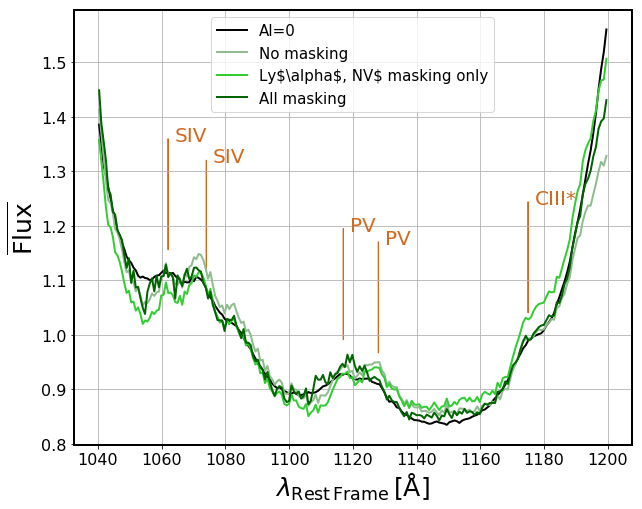

In [32]:
#Continuum for one quartile, testing masks
colors = colors_green
path=path2
titles = ['AI=0', 'No masking', r'Ly$\alpha$, NV$ masking only', 'All masking']
#colors = colors_blue
#path = quartiles_path
#titles = ['AI=0','0<AI<250','250<AI<839','839<AI<2221','AI>2221']

#colors = colors_orange
#path = old_path
#titles = ['No BALs','Unmasked BALs Only','Masked BALs Only']


plt.figure(figsize=(10,8))
for i,path in enumerate(path):
    data = fitsio.FITS(path)
    label = 'LYA'
    loglam_rest = data[3]['LOGLAM_REST'][:]
    mean_cont   = data[3]['MEAN_CONT'][:]
    cut = (mean_cont!=0.) & (data[3]['WEIGHT'][:]>0.)
    loglam_rest = loglam_rest[cut]
    mean_cont   = mean_cont[cut]
                            
    #Average between 1140 - 1160
    shift_mask = (loglam_rest > np.log10(1130)) & (loglam_rest < np.log10(1135))
    shift_data = mean_cont[shift_mask]
    shift_avg = np.mean(shift_data)
    #Save average for ai=0 case
    if i==0:
        mean0 = shift_avg
        shift=0
    else:
        shift = shift_avg - mean0
    
    plt.plot(10.**loglam_rest, mean_cont, linewidth=2,color=colors[i])

plt.legend(fontsize=15,loc="upper center",labels=titles)

#Emission line markers
e_lines = [1062,1074,1117,1128,1175]
e_line_names = [r'SIV',r'SIV',r'PV',r'PV',r'CIII*']
for i,line in enumerate(e_lines):
    #find mean_cont near this emission line
    line_cont_cut = loglam_rest > np.log10(line)
    cont_cut = mean_cont[line_cont_cut]
    y_end = cont_cut[0]
    print(y_end)
    
    plt.arrow(line,y_end+0.05,0,0.2,color=mcd.CSS4_COLORS['chocolate'])
    plt.text(line+2,y_end+0.25,e_line_names[i],color=mcd.CSS4_COLORS['chocolate'],size=20)

plt.grid()
plt.xlabel(r'$\lambda_{\mathrm{Rest \, Frame}} \, [\mathrm{\AA}]$', fontsize=25)
plt.ylabel(r'$\mathrm{\overline{Flux}}$', fontsize=25)
#plt.title(r'839<AI<2221', fontsize=25)
plt.savefig('PaperPlots/mean_flux_ai75_MaskTest.png'.format(label))

#plt.show()

In [144]:
plt.figure(figsize=(10,8))
for i,path in enumerate(path):
    data = fitsio.FITS(path)
    label = 'LYA'
    loglam_rest = data[4]['LOGLAM_REST'][:]
    mean_cont   = data[4]['MEAN_CONT'][:]
    #mean_cont   = data[3]['WEIGHT'][:]
    cut = (mean_cont!=0.) & (data[3]['WEIGHT'][:]>0.)
    loglam_rest = loglam_rest[cut]
    mean_cont   = mean_cont[cut]
    plt.plot(10.**loglam_rest, mean_cont, linewidth=2,color=colors[i])
    print(np.mean(mean_cont))

plt.legend(fontsize=20,loc="upper center",labels=titles)

plt.vlines(1117,0.8,1.2,color='red') #PV1
plt.vlines(1128,0.8,1.2,color='red') #PV2
plt.vlines(1062,0.8,1.2,color='red') #SIV1
plt.vlines(1074,0.8,1.2,color='red') #SIV2
plt.vlines(1175,0.8,1.2,color='red') #CIII

plt.grid()
plt.xlabel(r'$\lambda_{\mathrm{Rest \, Frame}} \, [\mathrm{\AA}]$', fontsize=25)
plt.ylabel(r'$\mathrm{\overline{Flux}}$', fontsize=25)
plt.title(r'839<AI<2221', fontsize=25)
#plt.savefig('PaperPlots/mean_cont_{}_BAL_AI.png'.format(label)) #I think I accidentally overwrote this at some point

#plt.show()

OSError: FITSIO status = 116: error seeking file position
failed get the size of the following file: (ffopen)
/


[1844565. 2441905. 2775579. 2617961. 2053060. 2097252. 1827662. 1615981.
 1475480. 1130775. 1129210. 1042477.  879325.  745304.  637063.  503550.
  402366.  320586.  236376.  184113.]
[ 87945. 115007. 125464. 117238.  91791.  94887.  84402.  76620.  70930.
  55626.  55726.  51026.  41681.  34630.  29032.  22695.  18098.  14732.
  11414.   9492.]
[62085. 87210. 98911. 94110. 74484. 77435. 68530. 62323. 57986. 44662.
 44505. 41697. 34470. 29102. 24809. 19853. 15011. 11631.  8600.  7282.]
[36611. 52544. 58852. 53920. 41588. 44003. 38567. 36260. 36872. 29575.
 28724. 27647. 23841. 20574. 17504. 13000.  8784.  6722.  5613.  4933.]
[36611. 52544. 58852. 53920. 41588. 44003. 38567. 36260. 36872. 29575.
 28724. 27647. 23841. 20574. 17504. 13000.  8784.  6722.  5613.  4933.]


Text(0.5,1,'intrinsic variance: LYA')

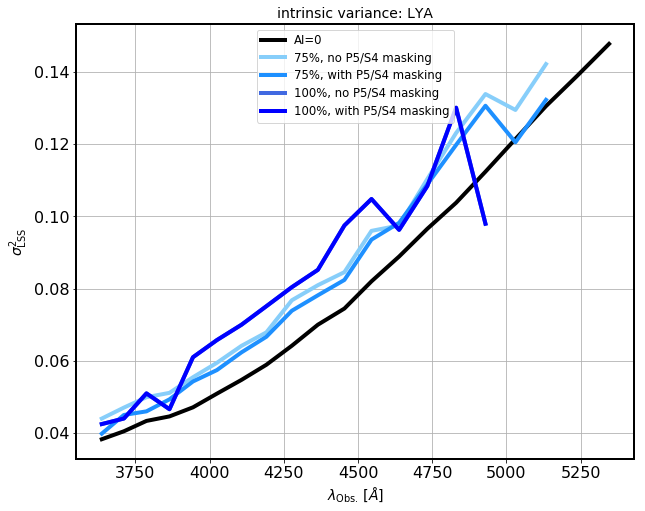

In [71]:
plt.figure(figsize=(10,8))
for i in range(len(path)):
    data = fitsio.FITS(path[i])
    label = 'LYA'
    loglam    = data[2]['LOGLAM'][:]
    var_lss   = data[2]['VAR_LSS'][:]
    nb_pixels = data[2]['NB_PIXELS'][:]
    cut       = (nb_pixels>0.)&(var_lss!=0.1)
    loglam    = loglam[cut]
    var_lss   = var_lss[cut]
    print(nb_pixels[:])
    plt.errorbar(10.**loglam, var_lss, linewidth=4, color=colors[i])

plt.legend(fontsize="small",loc="upper center",labels=folders)
plt.grid()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$',fontsize=14)
plt.ylabel(r'$\sigma^{2}_{\mathrm{LSS}}$',fontsize=14)
plt.title('intrinsic variance: '+label)


Text(0.5,1,'noise correction: LYA')

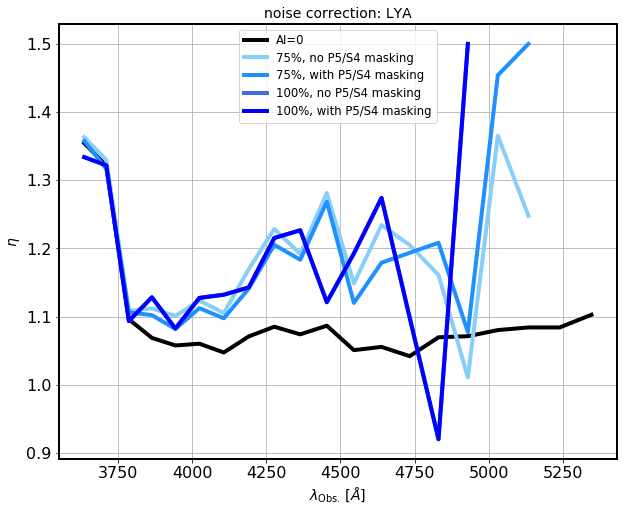

In [67]:
###ETA
plt.figure(figsize=(
    10,8))
for i in range(len(path)):
    data = fitsio.FITS(path[i])
    label = 'LYA'
    loglam    = data[2]['LOGLAM'][:]
    eta       = data[2]['ETA'][:]
    nb_pixels = data[2]['NB_PIXELS'][:]
    cut = (nb_pixels>0.)&(eta!=1.)
    loglam = loglam[cut]
    eta    = eta[cut]
    plt.errorbar(10.**loglam, eta, linewidth=4,color=colors[i])
    
plt.legend(fontsize="small",loc="upper center",labels=folders)
plt.grid()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$',fontsize=14)
plt.ylabel(r'$\eta$',fontsize=14)
plt.title('noise correction: '+label)


Text(0.5,1,'fudge factor: LYA')

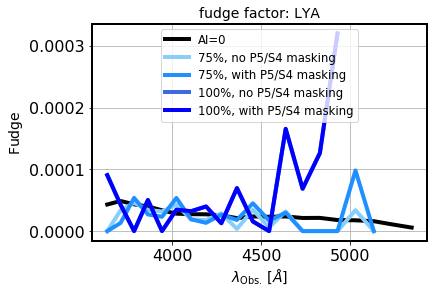

In [68]:
### FUDGE
for i in range(len(path)):
    data = fitsio.FITS(path[i])
    label = 'LYA'
    loglam    = data[2]['LOGLAM'][:]
    fudge     = data[2]['FUDGE'][:]
    nb_pixels = data[2]['NB_PIXELS'][:]
    cut       = (nb_pixels>0.)&(fudge!=1.e-7)
    loglam    = loglam[cut]
    fudge     = fudge[cut]
    plt.plot(10.**loglam, fudge, linewidth=4, color=colors[i])

plt.legend(fontsize="small",loc="upper center",labels=folders)    
plt.grid()
plt.xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$',fontsize=14)
plt.ylabel(r'$\mathrm{Fudge}$',fontsize=14)
plt.title('fudge factor: '+label)
